In [58]:
import os
import pydicom
from matplotlib import pyplot as plt
import numpy as np
from skimage.filters import gaussian
from skimage.exposure import equalize_adapthist
from scipy.ndimage import rotate
from ipywidgets import interact, IntSlider
import ipywidgets as widgets
from IPython.display import display

In [59]:
dcm_path = '/Users/juntangwang/Desktop/SRS00013/IMG00001.DCM'
folder_path = '/Users/juntangwang/Desktop/SRS00013/'  # Update this to the path of your DICOM folder

In [92]:
def time_to_seconds(t):
    """Converts a time string in HHMMSS.fff format to seconds."""
    hours, minutes, seconds = int(t[:2]), int(t[2:4]), float(t[4:])
    return 3600 * hours + 60 * minutes + seconds

dicom_files = [f for f in os.listdir(folder_path) if f.endswith('.DCM')]

# Initialize a list to hold your image data
image_data = []
acquisition_times = []
image_positions = []

for file in dicom_files:
    file_path = os.path.join(folder_path, file)
    ds = pydicom.dcmread(file_path)
    
    # Preprocess the image as necessary. This is just a placeholder for any actual preprocessing you need to do.
    # For example: image = preprocess(ds.pixel_array)
    image_data.append(ds.pixel_array)
    
    # Extract acquisition time; note that you'll need to adjust 'AcquisitionTime' based on your DICOM files' metadata structure
    acquisition_times.append(time_to_seconds(ds.AcquisitionTime))
    image_positions.append(ds.ImagePositionPatient)
    
    

In [93]:
image_data = np.array(image_data)
image_positions = np.array(image_positions)
acquisition_times = np.array(acquisition_times)

# Assuming these are your original lists:
# image_data = [np.array(...) for _ in range(1000)]  # Each a 256x256 numpy array
# image_position = [np.array(...) for _ in range(1000)]  # Each a 1x3 numpy array
# acquisition_time = [np.random.rand() for _ in range(1000)]  # Each a random float

# Step 1: Combine the lists into a single list of tuples
combined = list(zip(image_data, image_positions, acquisition_times))

# Step 2: Sort the combined list by the image_position (assuming it's the second element of the tuple)
combined.sort(key=lambda x: x[1][1])  # Adjust the lambda function if sorting criteria are different

# Step 3: Separate the combined list back into three lists
image_data_sorted, image_position_sorted, acquisition_time_sorted = zip(*combined)

# If you need the results to be in list format instead of tuples (especially for the image data), you can convert them
image_data_sorted = list(image_data_sorted)
image_position_sorted = list(image_position_sorted)
acquisition_time_sorted = list(acquisition_time_sorted)

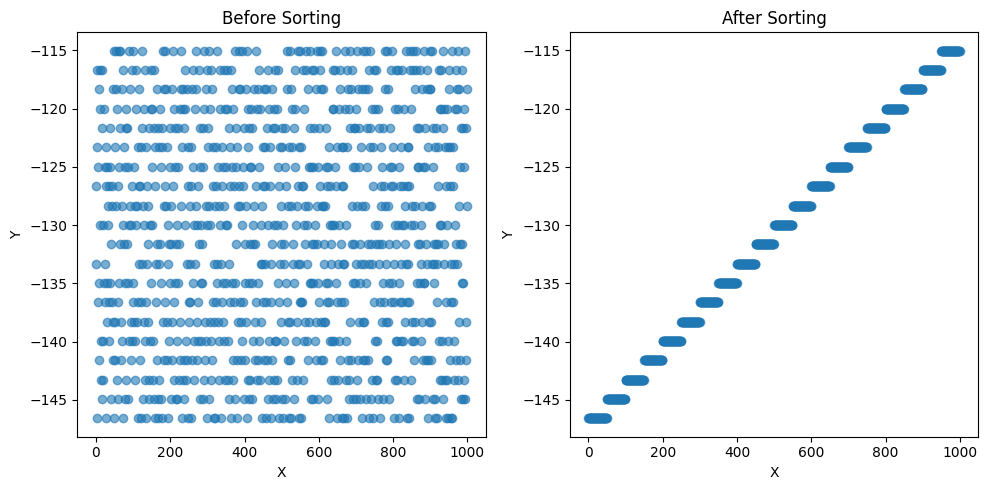

In [100]:
a = []
for i in range(len(image_data_sorted)):
    a.append(i)
    
a = np.asarray(a)
# Assuming image_position and image_position_sorted are your original and sorted position lists respectively

# Convert lists to numpy arrays for easier slicing
original_positions = np.array(image_positions)
sorted_positions = np.array(image_position_sorted)

# Before sorting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(a[:], original_positions[:, 1], alpha=0.6)
plt.title('Before Sorting')
plt.xlabel('X')
plt.ylabel('Y')

# After sorting
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(a[:], sorted_positions[:, 1], alpha=0.6)
plt.title('After Sorting')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

In [95]:
# Assuming these are your original lists sorted from the previous step:
# image_data_sorted, image_position_sorted, acquisition_time_sorted

# Step 1: Combine the sorted lists into a single list of tuples again
combined_sorted = list(zip(image_data_sorted, image_position_sorted, acquisition_time_sorted))

# Convert image_position numpy arrays to tuples for sorting purposes
combined_sorted_with_tuple_positions = [(data, tuple(position), time) for data, position, time in combined_sorted]

# Step 2: First sort by acquisition_time
combined_sorted_with_tuple_positions.sort(key=lambda x: x[2])

# Then sort by image_position to group, maintaining time sort within groups
combined_sorted_with_tuple_positions.sort(key=lambda x: x[1])

# If needed, convert the tuple positions back to numpy arrays (this step might be optional depending on your use case)
combined_final_sorted = [(data, np.array(position), time) for data, position, time in combined_sorted_with_tuple_positions]

# Separate the combined list back into three lists
image_data_final_sorted, image_position_final_sorted, acquisition_time_final_sorted = zip(*combined_final_sorted)

# Convert back to lists if necessary
image_data_final_sorted = list(image_data_final_sorted)
image_position_final_sorted = list(image_position_final_sorted)
acquisition_time_final_sorted = list(acquisition_time_final_sorted)


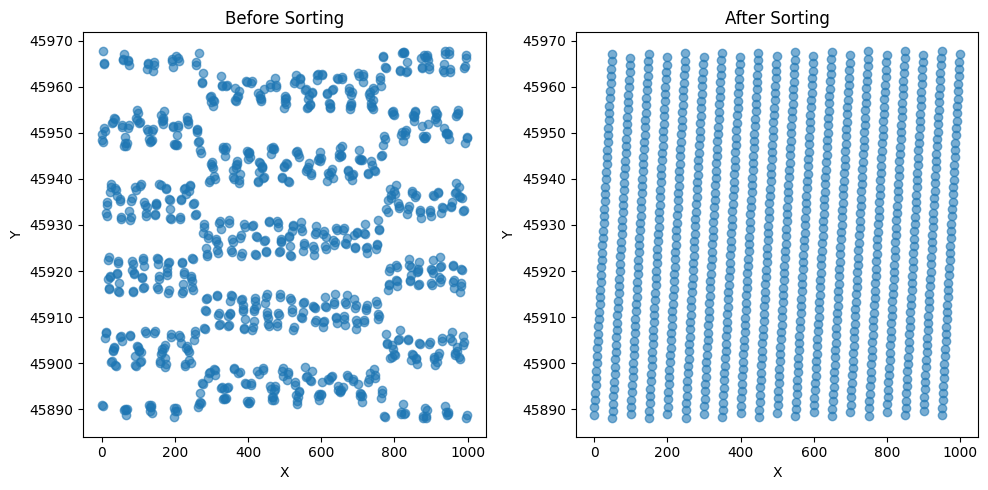

In [101]:
a = []
for i in range(len(image_data_sorted)):
    a.append(i)
    
a = np.asarray(a)
# Assuming image_position and image_position_sorted are your original and sorted position lists respectively

# Convert lists to numpy arrays for easier slicing
original_positions = np.array(acquisition_times)
sorted_positions = np.array(acquisition_time_final_sorted)

# Before sorting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(a[:], original_positions[:], alpha=0.6)
plt.title('Before Sorting')
plt.xlabel('X')
plt.ylabel('Y')

# After sorting
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(a[:], sorted_positions[:], alpha=0.6)
plt.title('After Sorting')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()